In [9]:
import numpy as np
import matplotlib.pyplot as plt
# signal varies from 0.4 to 2.0 seconds 
possible_lens = [x/10 for x in range(4,21)]
max_bin_size = 4 # in seconds 
# max_sample_per_bin = 4 
max_search_depth =len(possible_lens) 

In [14]:
def pack(samples,labels):

    packing_identifiers = [] # used to trace back the position and length of original sequences in a packed sequence

    bins = []
    bin_labels = []


    while len(samples) > max_search_depth:
        # print("hit")

        bin_used = 0
        depth_explored = 0
        
        identifiers = []
        tar_bin = []
        tar_labels = []
        examples_added = 0 # counter for no of examples packed


        while bin_used < max_bin_size and depth_explored <= max_search_depth and len(samples) > max_search_depth: 
            # print("len(samples) ",len(samples))
            # print("depth_explored",depth_explored)
            
            available_bin = max_bin_size - bin_used
            # adding the sample into bin if it does not exceed the max size

            if samples[depth_explored] <= available_bin :
                
                # creating an identifier example of same length as is the example
                identifier=np.full(shape=samples[depth_explored],fill_value=examples_added)
                identifiers.append(identifier)


                tar_bin.append(samples.pop(depth_explored))
                tar_labels.append(labels.pop(depth_explored))

                depth_explored = 0                    
                examples_added += 1
                bin_used  = np.sum(tar_bin)

            else:

                # if sample can not be added incrementing the depth_explored
                depth_explored += 1
        
        packing_identifiers.append(identifiers)
        bins.append(tar_bin)
        bin_labels.append(tar_labels)


    return bins,bin_labels,packing_identifiers



In [15]:
samples = list(np.round(np.random.uniform(low=0.4,high=2.01,size=(50000)),decimals=1))
labels = list(np.arange(start=0,stop=50000,step=1))

In [16]:
bins,labels,identifiers = pack(samples,labels)

TypeError: expected a sequence of integers or a single integer, got '0.7'

In [130]:
labels,bins

([[0, 1, 2],
  [3, 4, 6, 9],
  [5, 7, 13],
  [8, 10, 15],
  [11, 12],
  [14, 16, 20, 21],
  [17, 18, 27],
  [19, 22, 23],
  [24, 25, 28, 43],
  [26, 29],
  [30, 31, 33],
  [32, 34, 35],
  [36, 37, 38, 46],
  [39, 40, 41, 56],
  [42, 44, 45],
  [47, 48, 49, 51],
  [50, 52, 53],
  [54, 55, 60],
  [57, 58, 62],
  [59, 61, 63],
  [64, 65, 66, 78],
  [67, 68, 69, 71],
  [70, 72],
  [73, 74, 75],
  [76, 77, 81],
  [79, 80],
  [82, 83, 84, 86],
  [85, 87, 88],
  [89, 90, 94],
  [91, 92],
  [93, 95, 96],
  [97, 98, 101],
  [99, 100, 104],
  [102, 103, 105, 106, 112],
  [107, 108, 109],
  [110, 111, 113, 115],
  [114, 116, 118, 121],
  [117, 119],
  [120, 122],
  [123, 124, 125],
  [126, 127, 128],
  [129, 130, 131],
  [132, 133, 134, 136, 143],
  [135, 137, 146],
  [138, 139, 150],
  [140, 141],
  [142, 144, 145],
  [147, 148, 151],
  [149, 152, 153, 157],
  [154, 155, 159],
  [156, 158, 164],
  [160, 161, 165, 166],
  [162, 163, 169, 172],
  [167, 168, 174],
  [170, 171],
  [173, 175],
  [176

In [131]:
sizes_used = []
for bin_elem in bins:
    sizes_used.append(sum(bin_elem))


In [132]:
sizes,freqs =np.unique(sizes_used,return_counts=True)

In [133]:
weights = np.array(freqs) / np.sum(freqs)

In [139]:
np.average(a=sizes,weights=weights)/4.0

0.9498297389330307

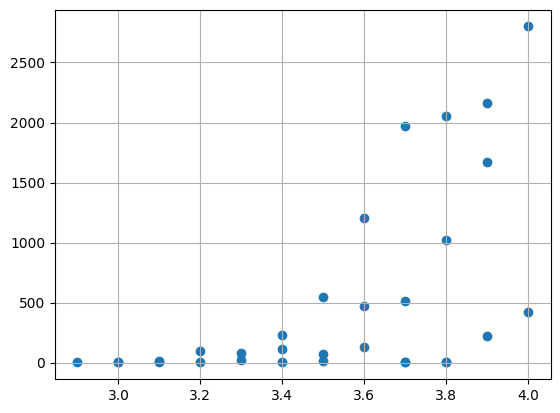

In [136]:
plt.scatter(sizes,freqs)
plt.grid()

In [137]:
samples_per_bin = []
for bin in bins:
    samples_per_bin.append(len(bin))

3.1519107075293222


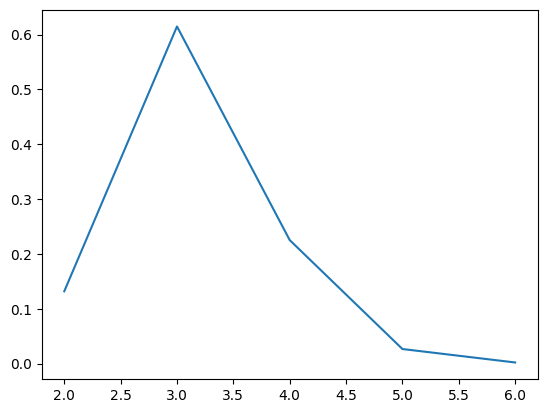

In [138]:
num_samples, freqs = np.unique(samples_per_bin,return_counts =True)
freqs = freqs/np.sum(freqs)
plt.plot(num_samples,freqs)
print(np.average(a=num_samples,weights=freqs))